# Opinion Analysis -- Space debris & Megaconstellations

#### Table of Content:
* [1. Overview of the question to address](#1-bullet)
* [2. Methods and data sources](#2-bullet)
    * [2.1 Preliminary dataset](#2.1-bullet)
    * [2.2 Methods of analysis](#2.2-bullet)
* [3. Data overview](#3-bullet)
    * [3.1 Space debris dataset](#3.1-bullet)
    * [3.2 Constellation dataset](#3.2-bullet)
* [4. Space debris dataset](#4-bullet)
    * [4.1 Latent Dirichlet Allocation](#4.1-bullet)
    * [4.2 Sentiment Analysis](#4.2-bullet)
    * [4.3 Discussion](#4.3-bullet)
* [5. Constellation dataset](#5-bullet)
    * [5.1 Latent Dirichlet Allocation](#5.1-bullet)
    * [5.2 Sentiment Analysis](#5.2-bullet)
    * [5.3 Discussion](#5.3-bullet)

## 1. Overview of the question to address <a class="anchor" id="1-bullet"></a>
The space debris issue can ce divided in two: 
- `historic debris`, i.e., debris which results from launches unti ~now
- `future debris`, which will mainly result from the launch of megaconstellations

In this context, the economic viability of Active Debris Removal (ADR) will depend on regulations. Regarding `historic debris`, financing ADR will partly depend on the states willingness to fund this activity. In democratic states, this will depend on public opinion regarding space debris. For `future debris`, the financing will also depend on regulations potentially requiring operators to deorbit their failed satellites. In this case also, public opinion regarding megaconstellations, especially how the tradeoff between benefits (from internet coverage, latency, etc.) outweights the potential costs (space debris generation, night sky pollution) is perceived, can influence the regulators.

## 2. Methods and data sources <a class="anchor" id="2-bullet"></a>
Addressing these questions using surveys is doable but the questions would be highly specific. Also, I don't have the necessary ressources. I propose to use tweets to adress this question instead. This is motivated by a recent paper by Caleb Pomeroy
published in space policy: ["The Quantitative Analysis of Space Policy: A Review of Current Methods and Future Directions"](https://www.sciencedirect.com/science/article/abs/pii/S0265964618300353). He advocates for the use of Twitter data to assess public opinion regarding space policy (see section 5.1).

### 2.1 Preliminary datasets <a class="anchor" id="2.1-bullet"></a>

As preliminary datasets, I have scraped all tweets (original, not the retweets) for which the identified language is English and which where published in December 2019, with the following keywords
- `Space debris`
- `Megaconstellation` or `Satellite constellation`

Each method of obtaining tweets as its advantages and drawbacks; those will be addressed/discussed later.

### 2.2 Methods of analysis <a class="anchor" id="2.2-bullet"></a>

As a first step to analyze these datasets, we can look at the topic discussed around these keywords. For this, we can use the latent Dirichlet allocation (LDA) topic model [(Blei et al.)](http://jmlr.org/papers/volume3/blei03a/blei03a.pdf) which is employed to reveal a collection of topics that appear in the tweets in an unsupervised fashion, that is, without human intervention such as the handcoding of tweets. We do this in [section 4.1](#4.1-bullet) and [section 5.1](#5.1-bullet).

Details on LDA can be found on [wikipedia](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation) or, e.g., in this [article](https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-latent-dirichlet-allocation-437c81220158). I haven't dealt with the details yet.

We can also look at how each of the topic revealed through LDA is perceived though sentiment analysis [(see section 4.2](#4.2-bullet)[ and 5.2)](#5.2-bullet). This can also be analyzed as a function of time and looking at how external events might shape the online discussion. Apart from the text in the tweets, the geographical localization of the user tweeting, as well as the number of 'likes' and 'retweets' can be analyzed.

## 3. Data overview <a class="anchor" id="3-bullet"></a>
### 3.1 Space debris dataset <a class="anchor" id="3.1-bullet"></a>


Let's first look at the `Space debris` dataset. I show 10 randomly selected tweets with their timestamp, number of likes and retweets.

In [158]:
import pandas as pd
import numpy as np
df_debris = pd.read_hdf('../Data/TwitterSpaceDebris.h5', 'data')
print('There are {0} tweets in this dataset.'.format(len(df_debris)))
df_debris[['text', 'timestamp', 'likes', 'retweets']].iloc[np.random.randint(0, len(df_debris),10)]

There are 2142 tweets in this dataset.


,text,timestamp,likes,retweets
1702,"India, US may conclude water, space debris, S&...",2019-12-11 04:03:47,0,0
1699,1. I’m thinking how we could feasibly make a p...,2019-12-11 05:34:58,1,0
776,"Watch ""Space Debris Is Now a Big Problem | VIC...",2019-12-29 08:44:18,0,0
1276,But after this comment India will definitely b...,2019-12-04 05:59:21,1,0
210,But there a look like the masses were a tyrann...,2019-12-07 10:08:26,0,0
1261,India is a relatively newcomer in the space ar...,2019-12-04 08:27:41,1,0
1538,@stefanjfrey at #orbitaldebris2019 presenting ...,2019-12-12 18:46:41,1,0
1797,European Space Agency to launch space debris c...,2019-12-10 16:39:40,0,0
348,Sell out event tonight with Wiltshire Wildlife...,2019-12-14 10:41:16,9,0
426,@SpaceX please stop launching all this space d...,2019-12-27 21:08:31,0,0


I then look at how many tweets where published daily.

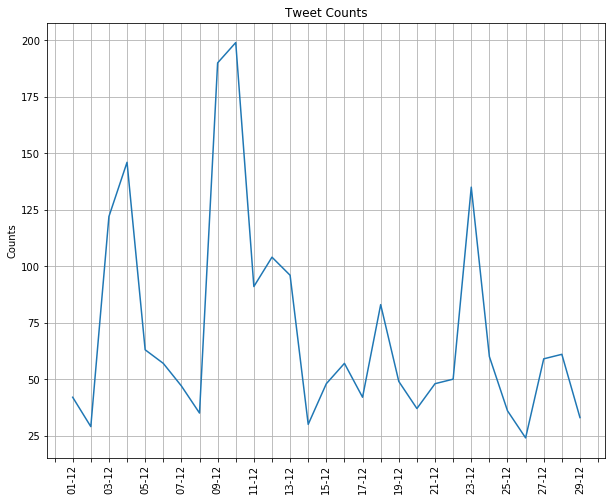

In [159]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings("ignore")

df = df_debris
tweet_counts = df.groupby(pd.cut(df['timestamp'], pd.date_range(min(df['timestamp']).date(), max(df['timestamp']).date(), freq='1D'))).count()['timestamp']
tweet_counts.index = [np.datetime64(str(x).split(',')[0][1:]) for x in tweet_counts.index]

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every month

days_fmt = mdates.DateFormatter('%d-%m')

fig, ax = plt.subplots(figsize=(10,8))

ax.plot(tweet_counts.index, tweet_counts)

plt.grid(True)
plt.title('Tweet Counts')
plt.ylabel('Counts')

# format the ticks
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(days_fmt)

#fig.autofmt_xdate()

for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
    
plt.xticks(rotation=90)
plt.show();

### 3.2 Constellation dataset <a class="anchor" id="3.2-bullet"></a>

Now, look at the `constellation` dataset.

In [160]:
df_const = pd.read_hdf('../Data/TwitterConstellation.h5', 'data')
print('There are {0} tweets in this dataset.'.format(len(df_const)))
df_const[['text', 'timestamp', 'likes', 'retweets']].iloc[np.random.randint(0, len(df_const),10)]

There are 1273 tweets in this dataset.


,text,timestamp,likes,retweets
1127,BBC News - Satellite constellations: Astronome...,2019-12-27 12:35:29,2,3
399,SpaceX internet satellite constellation for gl...,2019-12-09 16:29:29,0,0
1118,BBC News - Satellite constellations: Astronome...,2019-12-27 12:49:37,1,0
68,#Satellite mega-constellations stir a debate o...,2019-12-07 23:06:02,0,0
175,This Latin American earned the respect of the ...,2019-12-24 22:41:21,1,0
1139,BBC News - Satellite constellations: Astronome...,2019-12-27 12:18:24,0,0
53,Notice that these satellites from CASC are men...,2019-12-14 13:22:51,18,9
604,Satellite constellations: Astronomers warn of ...,2019-12-28 22:42:53,0,0
787,@MDA_maxar or @csa_asc can you answer that q...,2019-12-16 18:31:33,1,0
474,Remarkable achievement by the land of God toda...,2019-12-20 21:56:11,0,0


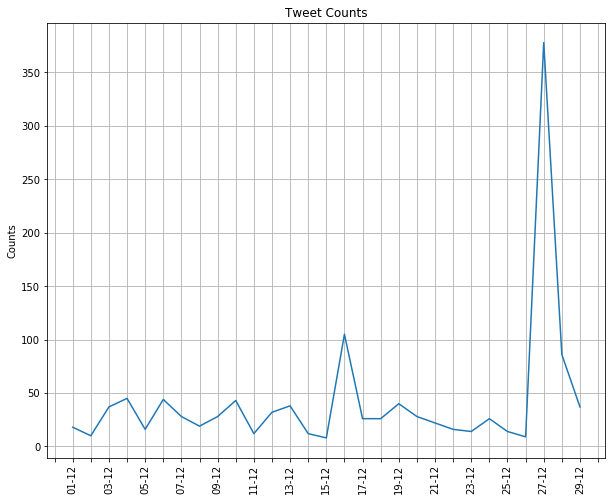

In [161]:
df = df_const

tweet_counts = df.groupby(pd.cut(df['timestamp'], pd.date_range(min(df['timestamp']).date(), max(df['timestamp']).date(), freq='1D'))).count()['timestamp']
tweet_counts.index = [np.datetime64(str(x).split(',')[0][1:]) for x in tweet_counts.index]

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every month

days_fmt = mdates.DateFormatter('%d-%m')

fig, ax = plt.subplots(figsize=(10,8))

ax.plot(tweet_counts.index, tweet_counts)

plt.grid(True)
plt.title('Tweet Counts')
plt.ylabel('Counts')

# format the ticks
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(days_fmt)

#fig.autofmt_xdate()

for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
    
plt.xticks(rotation=90)
plt.show();

## 4. Space debris dataset <a class="anchor" id="4-bullet"></a>

### 4.1 Latent Dirichlet Allocation <a class="anchor" id="4.1-bullet"></a>

I perform the LDA in "details" with the `Space debris` dataset first.

I first remove the special characters, punctuation, '@' mentions, and put the text in lowercase. I then remove the words 'space', 'debris', 'pic', 'twitter', and 'com'.

I show 10 randomly selected tweets after this step.

In [162]:
import re, gensim

tweets = df_debris[['text', 'retweets', 'likes']]

def clean_tweet(tweet, toremove=[]):
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        for wordtoremove in toremove:
            tweet = re.sub(r'\b('+wordtoremove+r')\b', ' ', tweet)
        
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

    
toremove = ['space', 'debris', 'pic', 'twitter','com']
tweets['text_processed'] = tweets['text'].apply(lambda x: clean_tweet(x, toremove))

tweets['text_processed'] = tweets['text_processed'].apply(lambda x: " ".join(
    gensim.utils.simple_preprocess(x, deacc=True, min_len=2, max_len=15)))

# Print out the first rows of papers
tweets['text_processed'].iloc[np.random.randint(0, len(tweets),10)]

35      space junks space debris is now big problem vi...
1843    european space agency to launch collector in b...
824     my eve experience wander into in my first crui...
2       van flandern who tracked all the for the milit...
615     top story esa to send clearspace robot to clea...
1272    your odds of being killed by are approximately...
1960    european space agency to launch collector in f...
2060    new study from sprint partner reveals extent o...
1557    esa to launch collector in unexplained mysteri...
638     space finally taking major steps to rein in sp...
Name: text_processed, dtype: object

I transform the textual data into a simple vector representation (Bag of Words: BOW). I then [lemmatize](https://en.wikipedia.org/wiki/Lemmatisation) the words, keeping only Noun, Adj, Verb, Adverb, Proper Noun.

In [163]:
import en_core_web_sm
nlp = en_core_web_sm.load()

def lemmatization(text, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    tw = nlp(text) 
    tw = ' '.join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in tw if token.pos_ in allowed_postags])
    return tw

# Do lemmatization keeping only Noun, Adj, Verb, Adverb, Proper Noun
tweets['tokens'] = tweets['text_processed'].apply(lambda x: lemmatization(x, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV', 'PROPN']))

Train the LDA model, with `number_topics=3` (this is one of the parameter which needs to be optimized) and print the model parameters. 

In [164]:
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(list(tweets['tokens']))

# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=3,            # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n tweets in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )

lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=3, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


Show the top 15 keywords for each topic.

In [165]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,launch,agency,european,collector,space,india,source,science,major,news,orbital,increase,spacedebris,dec,number
Topic 1,space,satellite,debris,earth,status,clean,spacedebris,problem,orbit,make,big,https,use,year,way
Topic 2,esa,clearspace,removal,world,junk,mission,plan,robot,european,utm,clear,space,head,tackle,warn


Look at the dominant topic in each tweet and show the distribution.

In [166]:
# Create Document - Topic Matrix
lda_output = lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic " + str(i) for i in range(lda_model.n_components)]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
tweets['dominant_topic'] = dominant_topic

df_topic_distribution = tweets['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,1,1072
1,0,649
2,2,421


Let's visualize it.

In [167]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=                 x            y  topics  cluster       Freq
topic                                                      
1     -1015.700562  1338.981201       1        1  38.362311
0      -387.996002  -373.316162       2        1  32.192967
2     -2184.745605   -60.565800       3        1  29.444722, topic_info=    Category        Freq        Term       Total  loglift  logprob
111  Default  468.000000         esa  468.000000  30.0000  30.0000
191  Default  454.000000      launch  454.000000  29.0000  29.0000
7    Default  403.000000      agency  403.000000  28.0000  28.0000
59   Default  305.000000   collector  305.000000  27.0000  27.0000
54   Default  278.000000  clearspace  278.000000  26.0000  26.0000
..       ...         ...         ...         ...      ...      ...
88    Topic3   71.510168         dec  152.122881   0.4678  -4.2445
115   Topic3  108.877444    european  425.006048  -0.1392  -3.8241
298   Topic3   79.132725     science  233.934667   0.1387  -4.1432
317   Topic3   88.186664       space  742.306540  -0.9077  -4.0349
242   Topic3   52.666150       orbit  195.597312  -0.0894  -4.5504

[159 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
7         2  0.926470     agency
7         3  0.071839     agency
17        1  0.027185    article
17        2  0.978667    article
26        2  0.979027  awareness
...     ...       ...        ...
391       1  0.995144        way
396       2  0.004431      world
396       3  0.996987      world
398       1  0.841168       year
398       2  0.152940       year

[184 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

### 4.2. Sentiment analysis <a class="anchor" id="4.2-bullet"></a>

For the three topics found in the `Space debris` dataset, we look at the sentiment (positive-negative) in the tweets.

In [168]:
from textblob import TextBlob

tweets['polarity'] = tweets['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
tweets['subjectivity'] = tweets['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

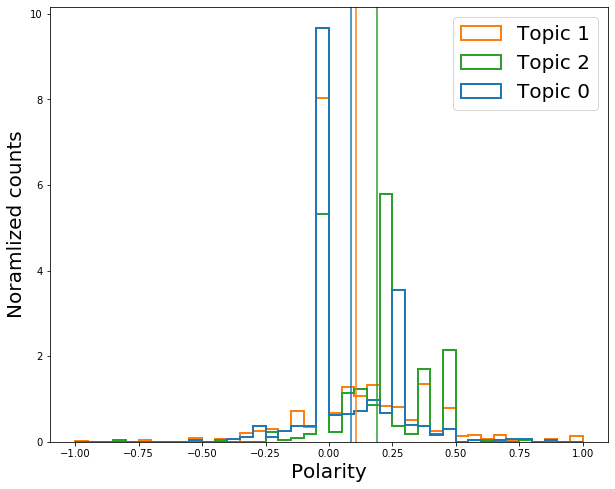

In [169]:
fig, ax = plt.subplots(figsize=(10,8))

for topic in tweets['dominant_topic'].unique():
    tw = tweets[tweets['dominant_topic']== topic]
    ax.hist(tw['polarity'], bins=np.arange(-1,1.05,0.05), density=True, histtype='step', linewidth=2, 
            label='Topic {0}'.format(topic),
           color='C{0}'.format(topic))
    ax.axvline(tw['polarity'].mean(), color='C{0}'.format(topic))
ft=20
ax.set_xlabel('Polarity', fontsize=ft)
ax.set_ylabel('Noramlized counts', fontsize=ft)
ax.legend(fontsize=ft)

### 4.3 Discussion <a class="anchor" id="4.3-bullet"></a>

It is hard with this dataset to clearly see different topics. Looking at a longer timespan and in more details at the tweets might yield better results.

Topic 0 and 2 are clearly linked to the announcement of the ESA mission ClearSpace-1. However, topic 0 contains the words 'india', 'source', and 'major' which might refer to the accusation by a senior Pakistani politician that India's space programme is becoming a major source of space debris [(see this BBC piece)](https://www.bbc.com/news/50827462). Tweets related to topic 0 are overall less positive than the ones related to topic 2, as expected due to 'India's space programme accusation'.

Topic 1 contains the biggest number of tweets and is a general view on space debris. 

## 5. Constellation dataset <a class="anchor" id="5-bullet"></a>

### 5.1 Latent Dirichlet Allocation <a class="anchor" id="5.1-bullet"></a>

I do the same as before but with the dataset `Constellation`.

In [170]:
tweets = df_const[['text', 'retweets', 'likes']]

toremove = ['megaconstellation', 'constellation', 'satellite', 'pic', 'twitter','com']
tweets['text_processed'] = tweets['text'].apply(lambda x: clean_tweet(x, toremove))

tweets['text_processed'] = tweets['text_processed'].apply(lambda x: " ".join(
    gensim.utils.simple_preprocess(x, deacc=True, min_len=2, max_len=15)))

# Print out the first rows of papers
tweets['text_processed'].iloc[np.random.randint(0, len(tweets),10)]

361    ghana all nations university wants to develop ...
747    view of night sky under threat astronomers say...
873    earth observation startup capella space will l...
441    the private sector wants to jump start commerc...
921    satellite constellations astronomers warn of t...
206    dan hegal explains nasa nasa lasercom infrared...
632    satellite constellations astronomers warn of t...
716    satellite constellations astronomers warn of t...
280    kepler to launch two batches of nanosatellites...
662    bbc news satellite constellations astronomers ...
Name: text_processed, dtype: object

In [171]:
# Do lemmatization keeping only Noun, Adj, Verb, Adverb, Proper Noun
tweets['tokens'] = tweets['text_processed'].apply(lambda x: lemmatization(x, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV', 'PROPN']))

In [172]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(list(tweets['tokens']))

# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=3,            # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n tweets in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )

lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=3, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [173]:
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,space,utm,launch,constellation,status,new,global,medium,source,plan,base,news,campaign,gps,html
Topic 1,constellation,satellite,spacex,starlink,sky,launch,earth,internet,leo,work,night,space,asteroid,killer,hide
Topic 2,constellation,satellite,astronomer,view,warn,universe,threat,news,bbc,science,environment,space,observation,capella,launch


In [174]:
# Create Document - Topic Matrix
lda_output = lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic " + str(i) for i in range(lda_model.n_components)]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
tweets['dominant_topic'] = dominant_topic

df_topic_distribution = tweets['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,2,660
1,1,401
2,0,212


In [175]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=                 x            y  topics  cluster       Freq
topic                                                      
2     -1015.700562  1338.981201       1        1  52.025658
1      -387.996002  -373.316162       2        1  26.965661
0     -2184.745605   -60.565800       3        1  21.008681, topic_info=    Category        Freq           Term       Total  loglift  logprob
11   Default  522.000000     astronomer  522.000000  30.0000  30.0000
199  Default  514.000000           view  514.000000  29.0000  29.0000
194  Default  500.000000       universe  500.000000  28.0000  28.0000
201  Default  501.000000           warn  501.000000  27.0000  27.0000
186  Default  500.000000         threat  500.000000  26.0000  26.0000
..       ...         ...            ...         ...      ...      ...
9     Topic3   26.972619        article   37.289612   1.2363  -4.4845
81    Topic3   29.441959         ground   48.833785   1.0542  -4.3969
43    Topic3   81.033390  constellation  906.150398  -0.8541  -3.3844
125   Topic3   40.427215           news  395.270156  -0.7198  -4.0798
122   Topic3   25.836687           need   46.666866   0.9690  -4.5275

[156 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2         3  0.975888  affordable
8         2  0.926151       apple
9         2  0.268171     article
9         3  0.724062     article
10        2  0.990567    asteroid
...     ...       ...         ...
200       3  0.962185        want
201       1  0.997602        warn
205       3  0.954962      window
206       2  0.965784        work
206       3  0.020995        work

[186 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

### 5.2. Sentiment analysis <a class="anchor" id="5.2-bullet"></a>

For the three topics found in the `Constellation` dataset, we look at the sentiment (positive-negative) in the tweets.

In [176]:
tweets['polarity'] = tweets['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
tweets['subjectivity'] = tweets['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

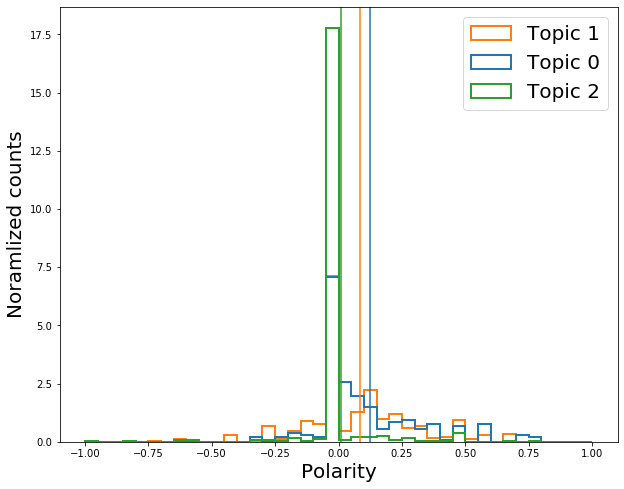

In [177]:
fig, ax = plt.subplots(figsize=(10,8))

for topic in tweets['dominant_topic'].unique():
    tw = tweets[tweets['dominant_topic']== topic]
    ax.hist(tw['polarity'], bins=np.arange(-1,1.05,0.05), density=True, histtype='step', linewidth=2, 
            label='Topic {0}'.format(topic),
           color='C{0}'.format(topic))
    ax.axvline(tw['polarity'].mean(), color='C{0}'.format(topic))


ft=20
ax.set_xlabel('Polarity', fontsize=ft)
ax.set_ylabel('Noramlized counts', fontsize=ft)
ax.legend(fontsize=ft)

### 5.3 Discussion <a class="anchor" id="5.3-bullet"></a>

Topic 2, which has the most tweets, and is focused on the issue of impact constelaltions might have on the night sky and astronomy observations. It is also merged with the launch announcement of part of the Capella constellation [(SpaceNews)](https://spacenews.com/capella-space-to-launch-seven-radar-satellites-in-2020-as-it-prepares-for-commercial-operations/).

Disentangling topic 0 and 1, is quite hard from this analysis. Further analysis could look at where space debris enters the topic.